In [196]:
%matplotlib inline

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [197]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [198]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [199]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preparing and cleaning data

In [200]:
def clean_data(df):
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    
    drop_columns = [
        "Id",
        "Alley",
        # "MasVnrType",
        "PoolQC",
        "Fence",
        "MiscFeature"   
    ]

    df = df.drop(drop_columns, axis=1)
    
    df["HasGarage"] = df["GarageType"].notna().astype(int)

    cat_cols = ["GarageQual", "GarageCond", "GarageFinish", "GarageType"]
    df[cat_cols] = df[cat_cols].fillna("None")

    df["GarageYrBltMissing"] = df["GarageYrBlt"].isna().astype(int)

    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

    num_cols = ["GarageCars", "GarageArea"]
    df[num_cols] = df[num_cols].fillna(0)

    cat_cols = ["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

    df[cat_cols] = df[cat_cols].fillna("None")

    num_cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
    df[num_cols] = df[num_cols].fillna(0)

    df['OpenPorchSF'] = df['OpenPorchSF'].fillna(0)
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

    return df

In [201]:
def categorize_columns(df):
    categorical_cols_to_encode = [
        'Street', 'Alley', 'BsmtCond', 'MasVnrType',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
        'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
        'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
        'SaleType', 'SaleCondition'
    ]

    df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
    
    return df


In [202]:
def prepare_clean_data(df):
  df = df.drop_duplicates()

  df['BsmtCond'] = df['BsmtCond'].fillna('NA')
  df['BsmtCond'].unique()

  median_frontage = df['LotFrontage'].median()
  df['LotFrontage'] = df['LotFrontage'].fillna(median_frontage)

  masVnrArea_mean = df['MasVnrArea'].mean()
  df['MasVnrArea'] = df['MasVnrArea'].fillna(masVnrArea_mean)

  garageYrBlt_mean = df['GarageYrBlt'].mean()
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(garageYrBlt_mean)
  
  df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)  
  df['1stFlrSF'] = df['1stFlrSF'].fillna(0)  
  df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)  
  df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)  
  df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)


  df['MasVnrType'] = df['MasVnrType'].fillna('None')
  df['BsmtQual'] = df['BsmtQual'].fillna('None')
  df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
  df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
  df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
  df['Electrical'] = df['Electrical'].fillna('None')
  df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
  df['GarageType'] = df['GarageType'].fillna('None')
  df['GarageFinish'] = df['GarageFinish'].fillna('None')
  df['GarageQual'] = df['GarageQual'].fillna('None')
  df['GarageCond'] = df['GarageCond'].fillna('None')
  df['PoolQC'] = df['PoolQC'].fillna('None')
  df['Fence'] = df['Fence'].fillna('None')
  df['MiscFeature'] = df['MiscFeature'].fillna('None')
  df['Alley'] = df['Alley'].fillna('None')

  df["GarageCars"] = df["GarageCars"].clip(0, 4)
  df["Fireplaces"] = df["Fireplaces"].clip(0, 3)


  return df

<Axes: xlabel='YrSold', ylabel='SalePrice'>

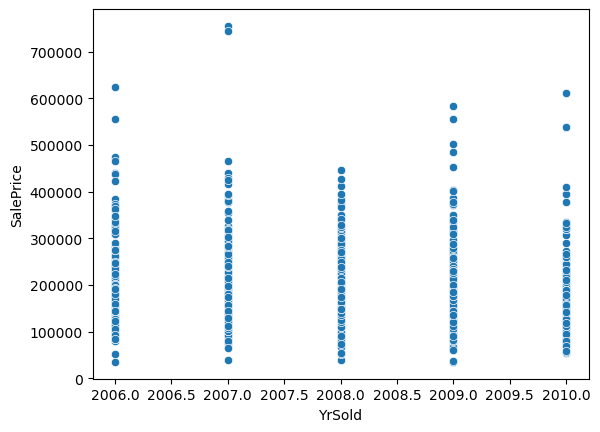

In [203]:
sns.scatterplot(df_train, x="YrSold", y="SalePrice")

In [204]:
def remove_outliers(df):
        
    columns = [  
    # "OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF",
    # "FullBath","YearBuilt","GarageYrBlt","YearRemodAdd","TotRmsAbvGrd","MasVnrArea",
    # "Fireplaces","LotArea","OpenPorchSF","BsmtFinSF1","LotFrontage","2ndFlrSF",
    # "WoodDeckSF","HalfBath","BsmtFullBath",
    # "BsmtUnfSF","BedroomAbvGr","OverallCond",
    "MSSubClass",
    "MoSold",
    "YrSold"
    ]
    for col in columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        median_value = df[col].median()

        outliers = (df[col] > upper_bound) | (df[col] < lower_bound)

        df.loc[outliers, col] = median_value
    
    return df

In [205]:
df_train = prepare_clean_data(df_train)
df_test = prepare_clean_data(df_test)

In [206]:
df_train = categorize_columns(df_train)
df_test = categorize_columns(df_test)

In [ ]:
# df_train = remove_outliers(df_train)
# df_test = remove_outliers(df_test)

## Feature selection

In [208]:
feature_columns = [
   'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'LotArea', 'BsmtFinSF1', 'OverallCond'
]

target_column = "SalePrice"

In [209]:
def iqr_outliers_count(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lo = q1 - k * iqr
    hi = q3 + k * iqr
    return ((df[col] < lo) | (df[col] > hi)).sum(), lo, hi

best_k = 1.5  # replace with chosen k
for c in feature_columns:
    cnt, lo, hi = iqr_outliers_count(df_train, c, k=best_k)
    if cnt > 0:
        print(f"{c:15s} outliers={cnt:4d} bounds=({lo:.2f}, {hi:.2f})")

OverallQual     outliers=   2 bounds=(2.00, 10.00)
GrLivArea       outliers=  31 bounds=(158.62, 2747.62)
GarageCars      outliers=   5 bounds=(-0.50, 3.50)
TotalBsmtSF     outliers=  61 bounds=(42.00, 2052.00)
1stFlrSF        outliers=  20 bounds=(118.12, 2155.12)
YearBuilt       outliers=   7 bounds=(1885.00, 2069.00)
Fireplaces      outliers=   5 bounds=(-1.50, 2.50)
LotArea         outliers=  69 bounds=(1481.50, 17673.50)
BsmtFinSF1      outliers=   7 bounds=(-1068.38, 1780.62)
OverallCond     outliers= 125 bounds=(3.50, 7.50)


In [210]:
skewed = ["LotArea","GrLivArea","TotalBsmtSF","1stFlrSF","BsmtFinSF1"]
for c in skewed:
    df_train[c] = np.log1p(df_train[c])
    df_test[c]  = np.log1p(df_test[c])

In [ ]:
def fit_iqr_bounds(df, cols, k=1.5):
    bounds = {}
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lo = q1 - k * iqr
        hi = q3 + k * iqr
        bounds[col] = (lo, hi)
    return bounds

def clip_with_bounds(df, bounds):
    df = df.copy()
    for col, (lo, hi) in bounds.items():
        df[col] = df[col].clip(lo, hi)
    return df

cap_cols = ["LotArea","GrLivArea","TotalBsmtSF","1stFlrSF","BsmtFinSF1"]
bounds = fit_iqr_bounds(df_train, cap_cols, k=1.5)

df_train = clip_with_bounds(df_train, bounds)
df_test  = clip_with_bounds(df_test, bounds)


<Axes: xlabel='SalePrice', ylabel='Density'>

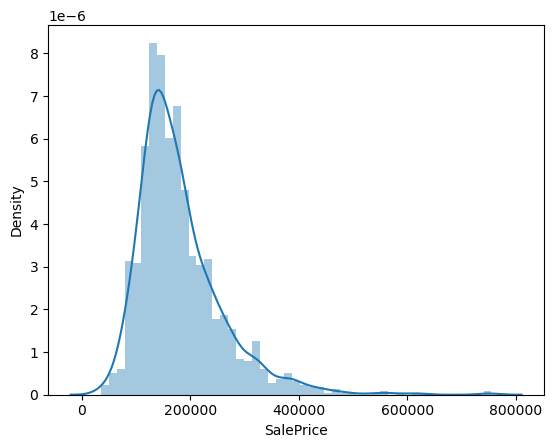

In [211]:
sns.distplot(df_train['SalePrice'])

<Axes: xlabel='LotArea', ylabel='SalePrice'>

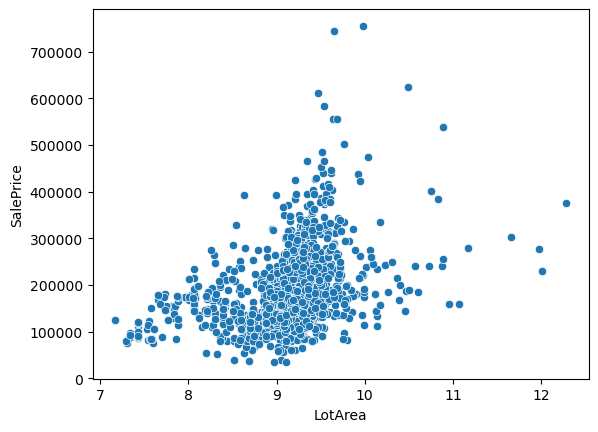

In [212]:
sns.scatterplot(df_train, x="LotArea", y="SalePrice")

# Train using GradientBoostingRegressor

In [213]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor


X = df_train[feature_columns]
y = np.log1p(df_train[target_column])  # log transform

numeric_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_preprocess, feature_columns)
])

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

param_grid = {
    "model__n_estimators": [800], # 1200, 1600
    "model__learning_rate": [0.01], # 0.05
    "model__max_depth": [3], # 4
    "model__min_samples_leaf": [5] # 10
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X, y)

print("Best CV RMSE:", -grid.best_score_)
print("Best params:", grid.best_params_)

best_model = grid.best_estimator_
best_model.fit(X, y)

X_test = df_test[feature_columns]
test_preds_log = best_model.predict(X_test)
test_predictions = np.expm1(test_preds_log)

submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)
print("Submission rows:", len(submission))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best CV RMSE: 0.13500088316825787
Best params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__n_estimators': 800}
Submission rows: 1459


## Plot: Predicted vs Actual RMSE

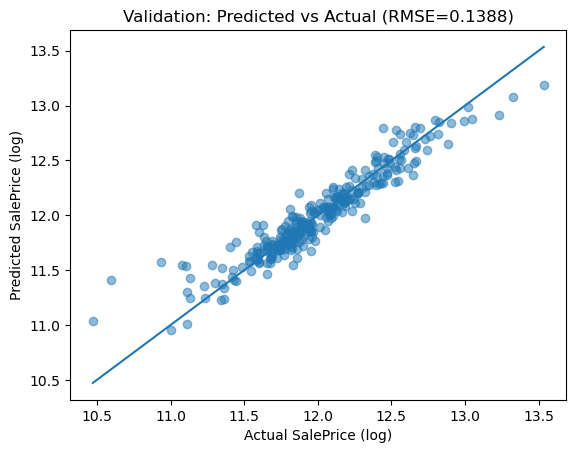

In [214]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

plt.figure()
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()]
)
plt.xlabel("Actual SalePrice (log)")
plt.ylabel("Predicted SalePrice (log)")
plt.title(f"Validation: Predicted vs Actual (RMSE={rmse:.4f})")
plt.show()


## Plot: Residual

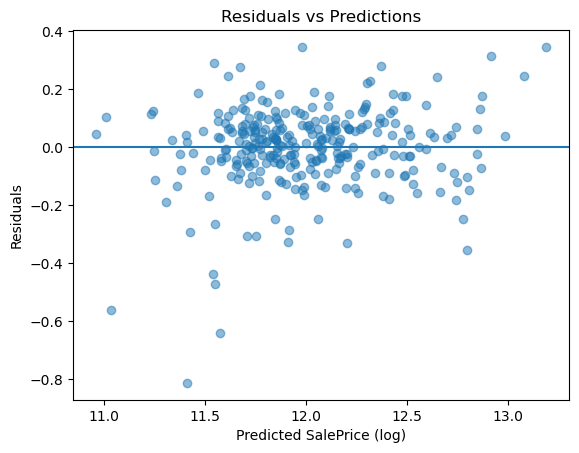

In [215]:
residuals = y_val - y_val_pred

plt.figure()
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted SalePrice (log)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()
